In [1]:
#!pip install praw

In [2]:
#!pip install pandas

In [3]:
#!pip install spacy

In [4]:
#!python -m spacy download en_core_web_sm

In [37]:
# !pip install wordcloud

In [24]:
import praw
import pandas as pd
import spacy
import json
import wordcloud
import matplotlib.pyplot as plt

In [6]:
reddit = praw.Reddit(client_id = 'kCBo5gVihm2ulQ', 
              client_secret = 'wKOxCsnHFh14k5rkwdKyIhfW9mKWeQ', 
              user_agent = 'text summarizer')

In [7]:
subreddit = 'Data Engineering'

new = reddit.subreddit(subreddit).new(limit = 1000)

new_data = []

for post in new:
    post_data = [post.title, post.selftext]
    submission = reddit.submission(id=  post.id)
    submission.comments.replace_more(limit = None)
    post_data.extend([comment.body for comment in submission.comments.list()])
        
    new_data.extend(post_data)

In [8]:
new_data[:10]

['Where can I find part-time data engineering jobs in the US?',
 "I have been working as a data engineer part-time/full-time for one year and have a total of two years of experience in software engineering (if you count my internship). I currently train full-time for a sport, trying to make the national team for my country.\n\nI could get this job to fit with my schedule, but I am currently looking for something else that can pay more and support me better. However, I'm limited in only having 20 hours a week to spare for work. Where can I find companies who will take me on part-time? Are startups the best option for this?",
 "I'm looking for part-time data engineers. DM me.",
 'What are your skills................................................',
 'try upwork',
 "Full time isn't enough time",
 'What sport? I might want your input into my side venture.',
 'Nice',
 'Data engineering',
 'Not Sure Where to go with my Career']

In [9]:
nlp = spacy.load("en_core_web_sm")

In [12]:
entities = {}

for text in new_data:
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ not in ['DATE', 'TIME', 'ORDINAL', 'CARDINAL', 'MONEY']:
            if ent.text not in entities.keys():
                entities[ent.text] = 1
            else:
                entities[ent.text] += 1

In [23]:
wc = wordcloud.WordCloud(background_color = 'white')
wc.generate_from_frequencies(entities)

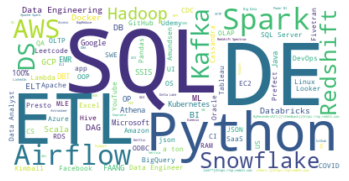

In [25]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()